In [75]:
from numpy import loadtxt
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [76]:
dataset = pd.read_csv('/content/diabetes2.csv')

In [77]:
dataset.isnull().any()
dataset = dataset.fillna(method='ffill')

In [78]:
X = dataset[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y = dataset['Outcome'].values

In [79]:
model = Sequential([
        Dense(12, input_shape=(8,),activation='relu'),
        Dense(8, activation='relu'),
        Dense(1,activation='sigmoid')])

In [80]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [81]:
history = model.fit(X,y,validation_split=0.33, epochs =300, batch_size=5, verbose= 1)

Epoch 1/300
103/103 [==============================] - 1s 6ms/step - loss: 3.2927 - accuracy: 0.4650 - val_loss: 1.5679 - val_accuracy: 0.4764
Epoch 2/300
103/103 [==============================] - 0s 4ms/step - loss: 1.4333 - accuracy: 0.5700 - val_loss: 1.0660 - val_accuracy: 0.6181
Epoch 3/300
103/103 [==============================] - 0s 5ms/step - loss: 1.0426 - accuracy: 0.5953 - val_loss: 0.8291 - val_accuracy: 0.6732
Epoch 4/300
103/103 [==============================] - 0s 5ms/step - loss: 0.9710 - accuracy: 0.6167 - val_loss: 1.0742 - val_accuracy: 0.6181
Epoch 5/300
103/103 [==============================] - 0s 4ms/step - loss: 0.8846 - accuracy: 0.6284 - val_loss: 0.7509 - val_accuracy: 0.5669
Epoch 6/300
103/103 [==============================] - 0s 5ms/step - loss: 0.8827 - accuracy: 0.6226 - val_loss: 0.7372 - val_accuracy: 0.6732
Epoch 7/300
103/103 [==============================] - 0s 4ms/step - loss: 0.7597 - accuracy: 0.6712 - val_loss: 0.6667 - val_accuracy: 0.6614

In [82]:
_, accuracy = model.evaluate(X,y)
print('Accuracy: %.2f'%(accuracy*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.7018
Accuracy: 70.18


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


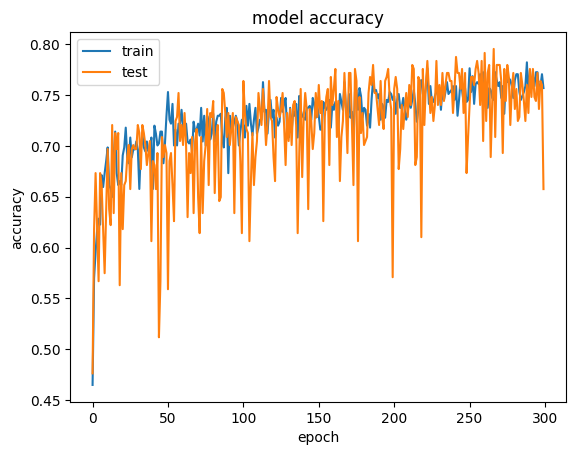

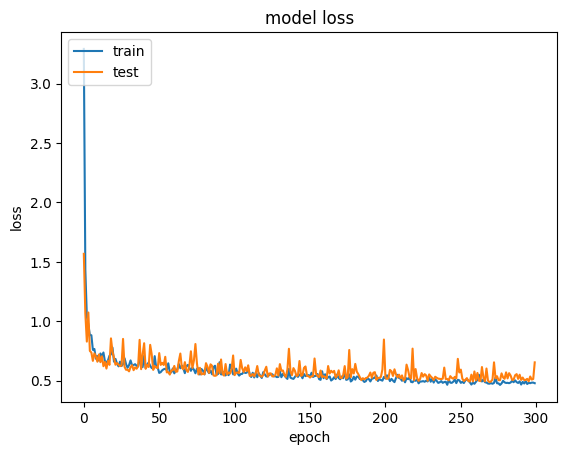

In [83]:
import matplotlib.pyplot as plt
print(history.history.keys())
#sumarise history from accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#sumarise history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()